# Linear Algebra in PyTorch

**Author:** Muhammed Ashrah  

**Source Adapted From:** Dive into Deep Learning ([d2.ail](https://d2l.ai/))  

> 📝 *This notebook is adapted from the "Linear Algebra" section of the Dive into Deep Learning book.*

This notebook provides a beginner-friendly walkthrough of basic linear algebra concepts using PyTorch.

---

You'll learn how to:

- Represent **vectors** and **matrices** with tensors
- Perform operations like **sum**, **mean**, and **transpose**
- Understand and compute the **dot product** and **Hadamard product**
- Differentiate between **element-wise multiplication** and **matrix multiplication**

---


> 💡 The goal is not just to run the code, but to understand what’s happening behind the scenes.  
Feel free to tweak the examples and experiment!


In [1]:
import torch

# Scalar Operations

##### Creating scalars

In [2]:
a=torch.tensor(5.0)
b=torch.tensor(3.0)

In [3]:
a.ndim # 0 proves that it is scalar as scalar is tensor of rank 0

0

In [4]:
b.ndim # 0 proves that it is scalar as scalar is tensor of rank 0

0

##### Operations

In [5]:
a+b # Addition

tensor(8.)

In [6]:
a-b # Substraction

tensor(2.)

In [7]:
a*b # Multiplication

tensor(15.)

In [8]:
a/b # Division

tensor(1.6667)

In [9]:
a//b # Integer Division

tensor(1.)

In [10]:
a%b # Remainder

tensor(2.)

In [11]:
a**b # Exponent

tensor(125.)

# Vector



In [12]:
c=torch.arange(3)
c.ndim # Dimension should be 1 as vector is tensor of rank 1

1

In [13]:
c # Would contain all elements from (0 to 3) where 3 is not included

tensor([0, 1, 2])

In [16]:
c.numel() # alternatively you can use len(c) . But this is only for vectors. However prefer to use numel as it can work with n-dimensional tensors

3

# Matrix

In [18]:
d=torch.arange(12).reshape(3,4)  # Matrix of 3 rows and 4 columns
d

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [19]:
d.T # Transpose

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

##### Symmetric matrix

In [25]:
e=torch.tensor([[1,0,0],[0,1,0],[0,0,1]])
print(e==e.T)


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


# Higher order Tensor

In [26]:
higher_order_tensor=torch.arange(24).reshape(2,3,4)
higher_order_tensor

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

# Tensor Arithmetic

Elementwise operations produce outputs that have the same shape as their operands.



In [37]:
tensor_A=torch.arange(6).reshape(2,3)
tensor_B=tensor_A.clone()
tensor_A,tensor_A+tensor_B

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[ 0,  2,  4],
         [ 6,  8, 10]]))

The elementwise product of two matrices is called their Hadamard product.

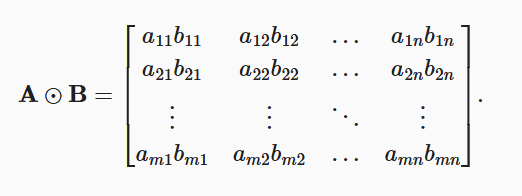

In [38]:
tensor_A*tensor_B

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])

Multiplying a constant into a matrix

In [39]:
key=3
print(tensor_A)
tensor_A*=key
tensor_A

tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[ 0,  3,  6],
        [ 9, 12, 15]])

### Sum of a tensor

In [40]:
print(tensor_B)
print(tensor_B.sum()) # Prints the sum of all indivdual elements of a matrix

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor(15)


Reducing a matrix along row

In [42]:
# If we want to print sum of columns
print(tensor_B.sum(axis=0))

tensor([3, 5, 7])


Reducing a matrix along column

In [45]:
# If we want to print sum of rows
print(tensor_B.sum(axis=1))

tensor([ 3, 12])


If we reduce by both row and column , we get the same result as sum

In [47]:
print(tensor_B.sum(axis=(0,1))==tensor_B.sum())

tensor(True)


### Calculating mean

In [51]:
# Method 1 - Direct

tensor_B.mean(dtype=float)

tensor(2.5000, dtype=torch.float64)

In [53]:
# Method 2 - Under the hood

sum=tensor_B.sum()   # First we calculate sum
n=tensor_B.numel()   # Next we get number of elements and perfom sum/n to get average
print(sum/n)

tensor(2.5000)


In [54]:
# We can also calculate along columns

tensor_B.mean(axis=0,dtype=float)

tensor([1.5000, 2.5000, 3.5000], dtype=torch.float64)

In [55]:
# We can also calculate along rows

tensor_B.mean(axis=1,dtype=float)

tensor([1., 4.], dtype=torch.float64)

# Dot Product

In [59]:
# Method 1 - Direct

X=torch.ones(3,dtype=float)
Y=torch.tensor([0,1,2],dtype=float)
torch.dot(X,Y)

tensor(3., dtype=torch.float64)

In [60]:
# Method 2 - Under the hood
torch.sum(X*Y)

tensor(3., dtype=torch.float64)

# Matrix-Vector Product

In [67]:
tensor_C=torch.arange(6, dtype=float).reshape(2,3)
torch.mv(tensor_C,X)

tensor([ 3., 12.], dtype=torch.float64)

Matrix-Matrix Product

In [71]:
tensor_D=torch.arange(9, dtype=float).reshape(3,3)

print(torch.mm(tensor_C,tensor_D))
print(torch.mm(tensor_C,tensor_D).shape)


tensor([[15., 18., 21.],
        [42., 54., 66.]], dtype=torch.float64)
torch.Size([2, 3])
tensor([[15., 18., 21.],
        [42., 54., 66.]], dtype=torch.float64)


# Shortcut for both MV and MM

In [72]:
print(tensor_C@tensor_D)

tensor([[15., 18., 21.],
        [42., 54., 66.]], dtype=torch.float64)


# Norms

L2 norm

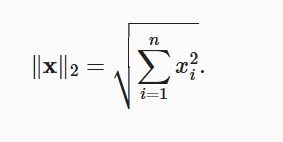

In [73]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [76]:
v=torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=float)
torch.norm(v)

tensor(16.8819, dtype=torch.float64)

L1 norm

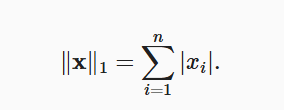

In [77]:
torch.abs(u).sum()

tensor(7.)

In [78]:
torch.abs(v).sum()

tensor(45., dtype=torch.float64)